# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#  Importing data

In [3]:
import pandas as pd

url = "https://drive.google.com/uc?export=download&id=1TLrqdOWJUSLwT9iAZ2BtAbbNkOb9Bdy-" 

df = pd.read_csv(url)
print(df.shape)
df.head()


(525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


##  1. Summary statistatistics and missing value report

---




In [5]:
print("Checking the data types of all columns")
print(df.info())

Checking the data types of all columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  flo

In [4]:
print("Change Timestamp column data type from object to DateTime and cleaning as categorical")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# Ensure the Cleaning flag is categorical
df['Cleaning'] = df['Cleaning'].astype('category')

Change Timestamp column data type from object to DateTime and cleaning as categorical


In [7]:
print("Since all columns except the timestamp and cleaning are numeric, here are their description")
df.describe()

Since all columns except the timestamp and cleaning are numeric, here are their description


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-04-25 12:00:30.000000768,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.001382,32.444403,33.543330,NaN
min,2021-10-25 00:01:00,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,13.100000,13.100000,NaN
25%,2022-01-24 06:00:45,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,23.900000,23.600000,NaN
50%,2022-04-25 12:00:30,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,28.400000,28.400000,NaN
75%,2022-07-25 18:00:15,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,40.600000,43.000000,NaN
max,2022-10-25 00:00:00,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,2.300000,70.400000,94.600000,NaN
std,NaN,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.026350,10.998334,12.769277,NaN


In [9]:
print("Check for missing values:")
print(df.isna().sum())

Check for missing values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [11]:
print("Columns with >5% nulls")
percent_null = df.isna().mean() * 100
cols_with_5per_null = percent_null[percent_null>5].index.tolist()
print(cols_with_5per_null)

Columns with >5% nulls
['Comments']


##  2. Outlier Detection & Basic Cleaning

---



###  2.1. Look for missing values, outliers, or incorrect entries

Visualize Outliers using Box Plot


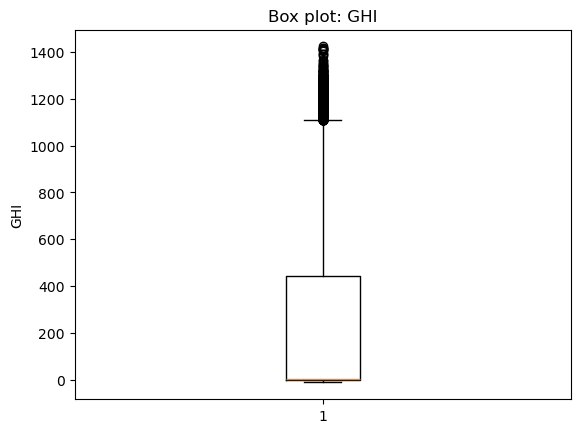

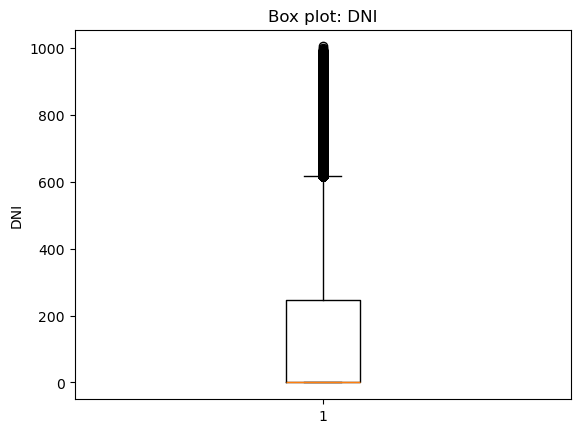

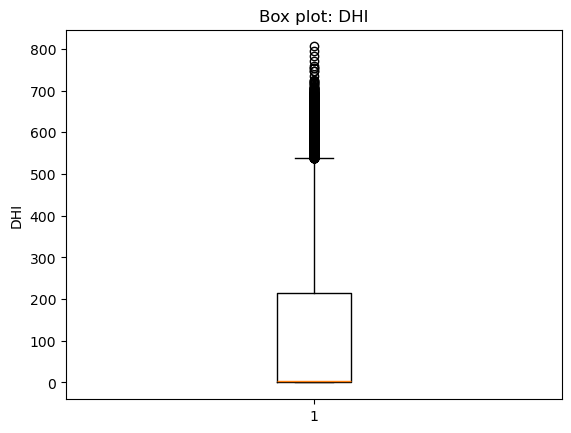

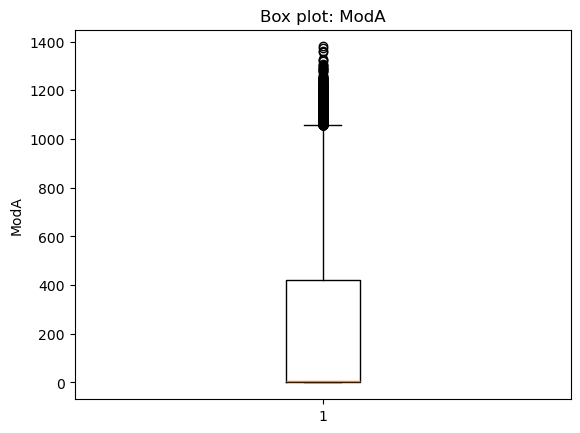

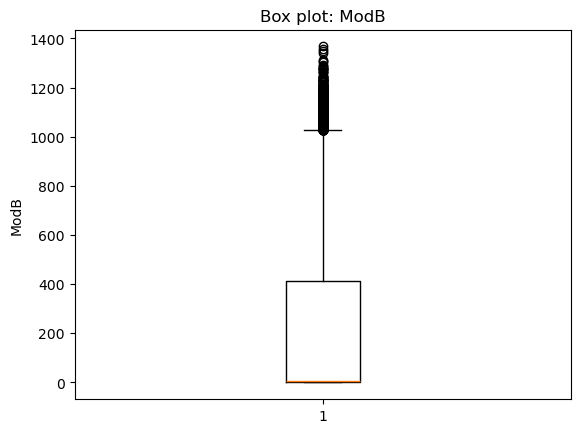

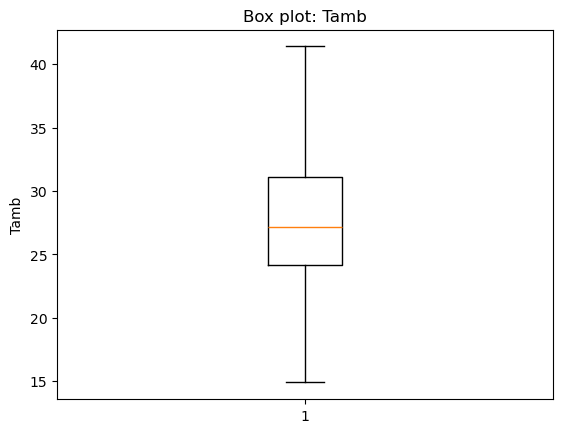

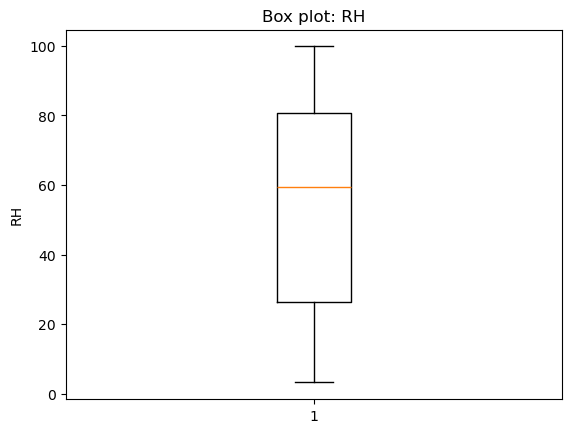

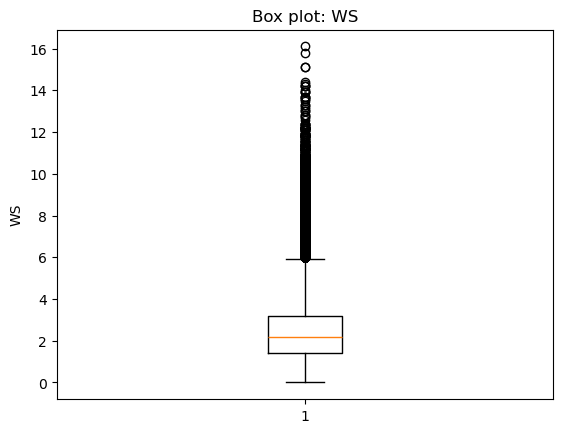

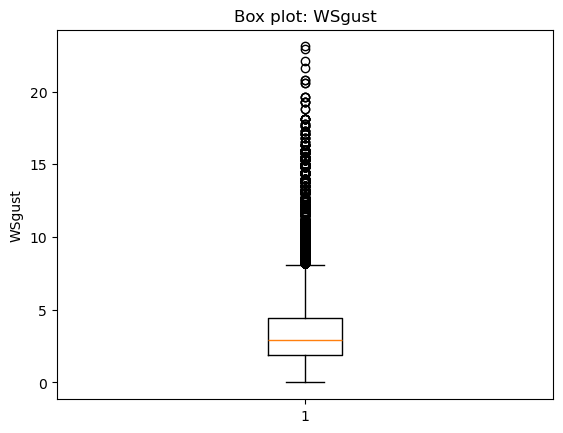

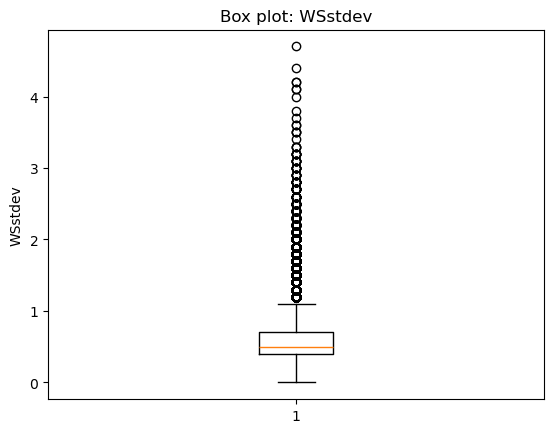

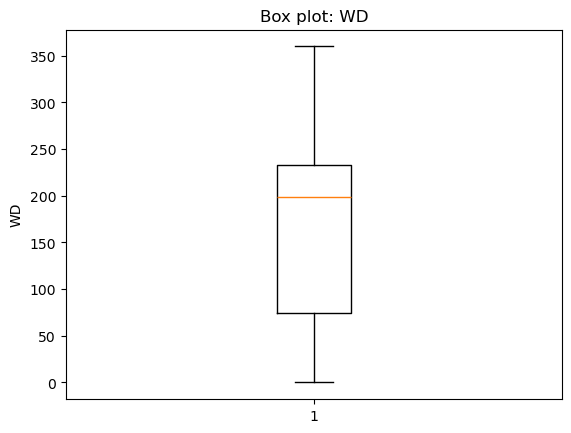

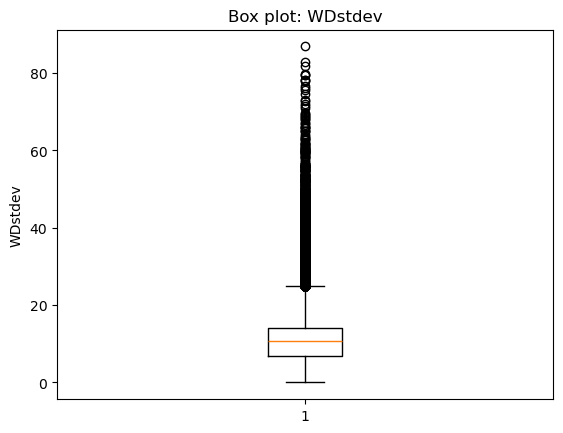

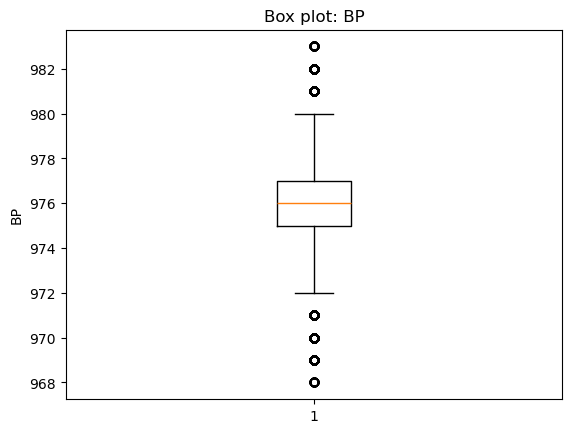

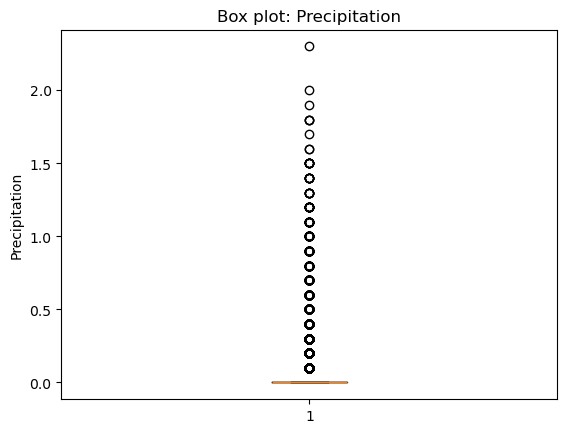

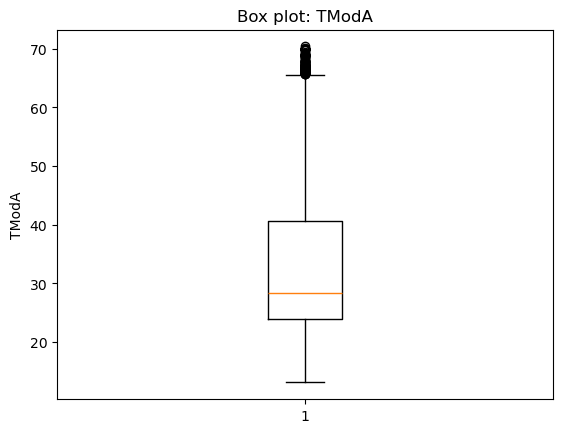

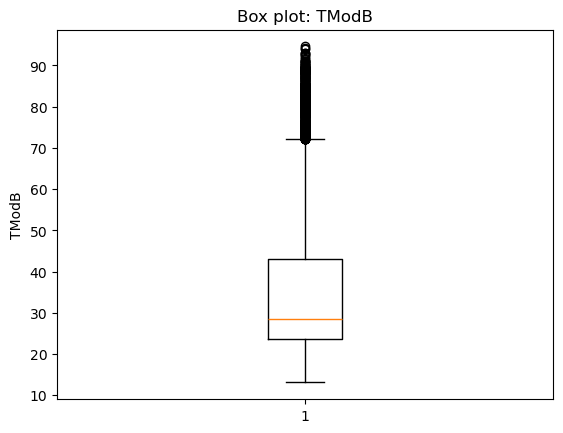

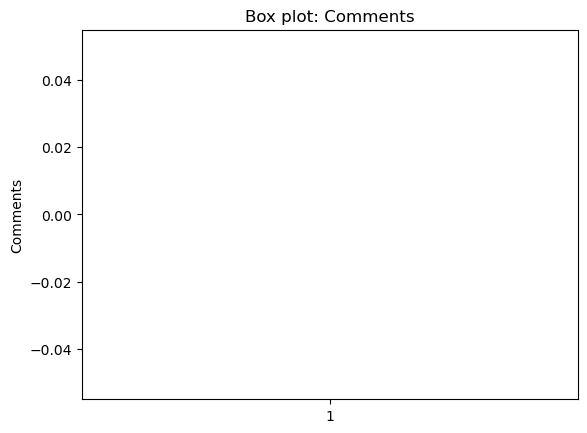

In [13]:
print("Visualize Outliers using Box Plot")
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    plt.figure()
    plt.boxplot(df[c].dropna())
    plt.title(f"Box plot: {c}")
    plt.ylabel(c)
    plt.show()


In [15]:
print("Numerically check outliers")
numeric_df = df.select_dtypes(include=['number'])

# Compute IQR for numeric columns
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers (True/False DataFrame)
outliers = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))

# Count outliers per column
outlier_counts = outliers.sum()
print(outlier_counts)

Numerically check outliers
GHI               1303
DNI              50586
DHI               7905
ModA              1237
ModB              1537
Tamb                 0
RH                   0
WS                8708
WSgust            7377
WSstdev          14669
WD                   0
WDstdev           6921
BP               19228
Precipitation     3338
TModA              137
TModB              573
Comments             0
dtype: int64


### 2.2. Compute Z-scores for GHI, DNI, DHI, ModA, ModB, WS, WSgust; flag rows with |Z|>3.

In [17]:
print("Using z-score")
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z = np.abs(stats.zscore(df[key_cols], nan_policy="omit"))
z_outliers_mask = (z > 3).any(axis=1)
print("Z-score outlier rows:", int(z_outliers_mask.sum()))

Using z-score
Z-score outlier rows: 9251


### 2.3. Drop or impute (median) missing values in key columns.

There are **no** missing values in key columns.

In [19]:
# Keep only rows where all |Z| <= 3 (no outliers)
#df_clean = df[(z < 3).all(axis=1)]

#print("After removing Z-score outliers:", df_clean.shape)

df_cleaned = df.dropna(axis=1, how='all')

# 5️⃣ Save cleaned dataset
df_cleaned.to_csv("../data/togo_clean.csv", index=False)

print("Cleaned dataset saved to: data/togo_clean.csv")

Cleaned dataset saved to: data/togo_clean.csv


In [21]:
print("Check Cleaned data")
clean_df = pd.read_csv("../data/togo_clean.csv")
print(clean_df.shape)

Check Cleaned data
(525600, 18)


## 3. Time Series Analysis

---


### 3.1. Line or bar charts of GHI, DNI, DHI, Tamb vs. Timestamp.

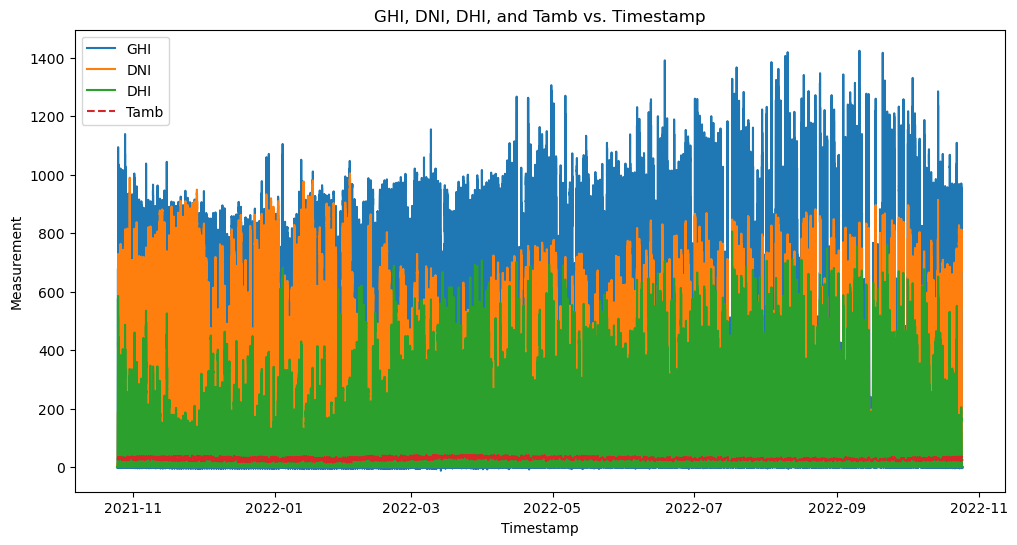

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Timestamp', y='GHI', label='GHI',errorbar = None)
sns.lineplot(data=df, x='Timestamp', y='DNI', label='DNI',errorbar = None)
sns.lineplot(data=df, x='Timestamp', y='DHI', label='DHI',errorbar = None)
sns.lineplot(data=df, x='Timestamp', y='Tamb', label='Tamb', linestyle='--',errorbar = None)
plt.title('GHI, DNI, DHI, and Tamb vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Measurement')
plt.legend()
plt.show()

### 3.2. Patterns by month, trends throughout day, or anomalies, such as peaks in solar irradiance or temperature fluctuations. 


In [25]:
# Add month col
df['Month'] = df['Timestamp'].dt.month

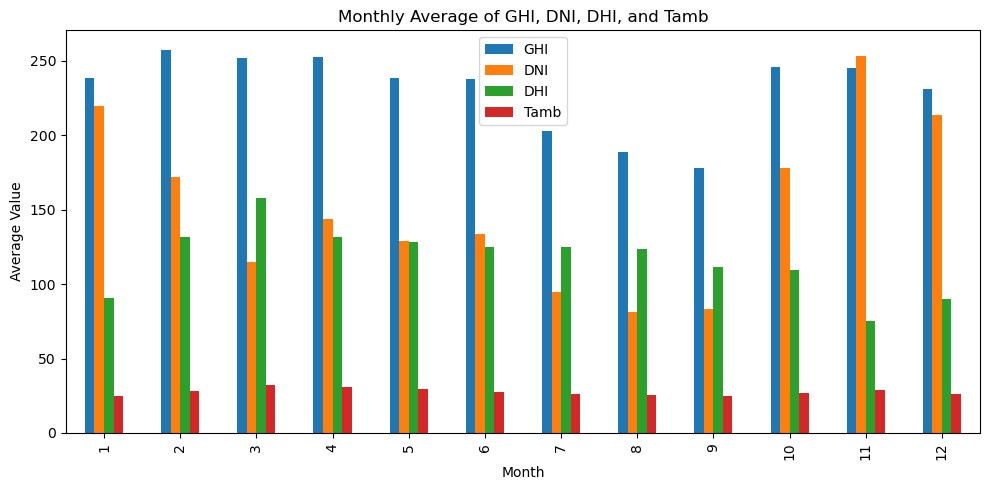

In [27]:
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

monthly_avg.plot(kind='bar', figsize=(10,5))
plt.title('Monthly Average of GHI, DNI, DHI, and Tamb')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.tight_layout()
plt.show()

In [29]:
# Add hour col
df['Hour'] = df['Timestamp'].dt.hour
hourly_avg = df.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

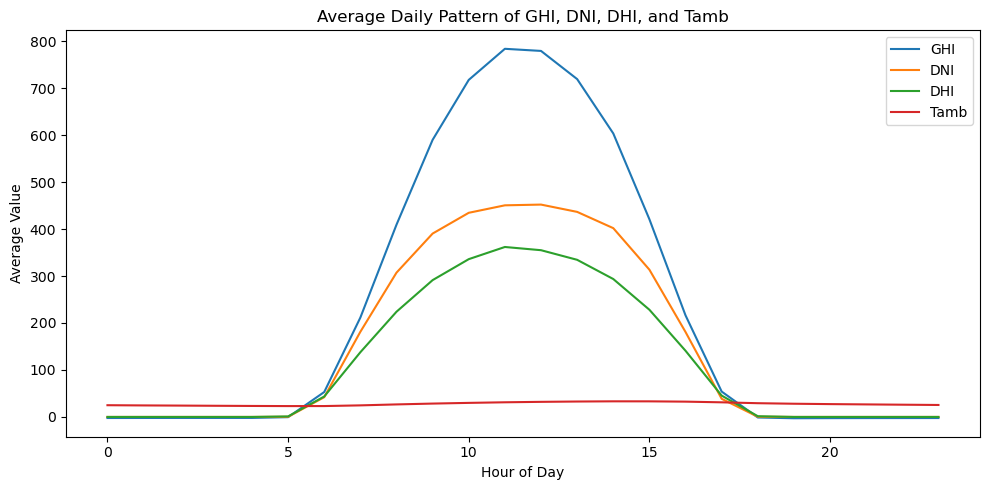

In [31]:
hourly_avg.plot(figsize=(10,5))
plt.title('Average Daily Pattern of GHI, DNI, DHI, and Tamb')
plt.xlabel('Hour of Day')
plt.ylabel('Average Value')
plt.tight_layout()
plt.show()

### Summary of day trend:
The three irradiance components (GHI, DNI, and DHI) follow a classic bell-shaped curve throughout the day, peaking around solar noon.Sunrise and Sunset: 
* Solar irradiance begins rising sharply around hour 6 and drops back to zero around hour 19 (7 PM), which indicates the approximate times of sunrise and sunset.
* **Peak Irradiance:** The peak occurs between hour 12 and hour 13 (noon and 1 PM).
* **GHI (Blue Line):** Represents the total available solar energy. It has the highest values, peaking near $\mathbf{800 \text{ W/m}^2}$.
* **DNI (Orange Line):** Represents the direct beam radiation. It is the next highest, peaking near $\mathbf{400 \text{ W/m}^2}$.
* **DHI (Green Line):** Represents the diffuse radiation (scattered light from the sky). It has the lowest values among the three, peaking around $\mathbf{350 \text{ W/m}^2}$.
* **Tamb (Red Line):** The ambient temperature remains relatively low and constant during the night and early morning hours (0 to 6).

C:\Users\Lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


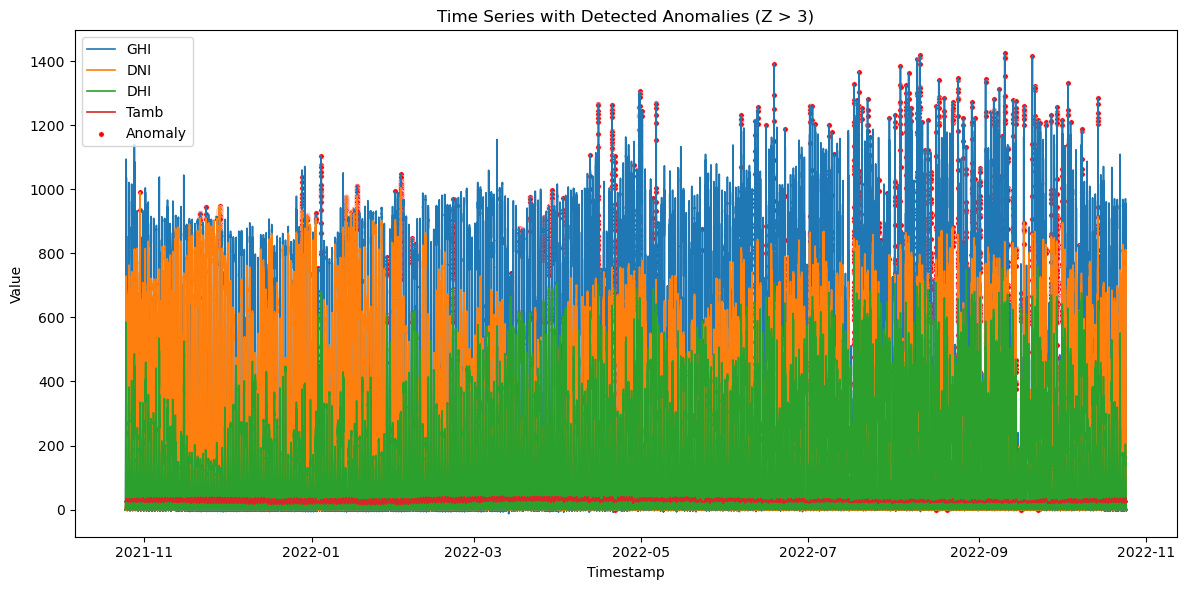

In [35]:
#Check for Anomalies using z-score
cols = ['GHI', 'DNI', 'DHI', 'Tamb']
z = np.abs(stats.zscore(df[cols], nan_policy='omit'))
df['Anomaly'] = (z > 3).any(axis=1)

# Melt for plotting
df_melted = df.melt(id_vars=['Timestamp', 'Anomaly'], value_vars=['GHI', 'DNI', 'DHI', 'Tamb'],
                    var_name='Variable', value_name='Value')

# Plot with anomalies highlighted
plt.figure(figsize=(12,6))
sns.lineplot(data=df_melted, x='Timestamp', y='Value', hue='Variable', linewidth=1.2)
sns.scatterplot(data=df_melted[df_melted['Anomaly']], x='Timestamp', y='Value', color='red', s=15, label='Anomaly')
plt.title('Time Series with Detected Anomalies (Z > 3)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()


## 4. Cleaning Impact

---

In [37]:
print(df['Cleaning'].value_counts())

Cleaning
0    525319
1       281
Name: count, dtype: int64


In [39]:
cleaning_avg = df.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()
cleaning_melted = cleaning_avg.melt(id_vars='Cleaning', var_name='Module', value_name='Average_Value')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12324\739648904.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cleaning_avg = df.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()


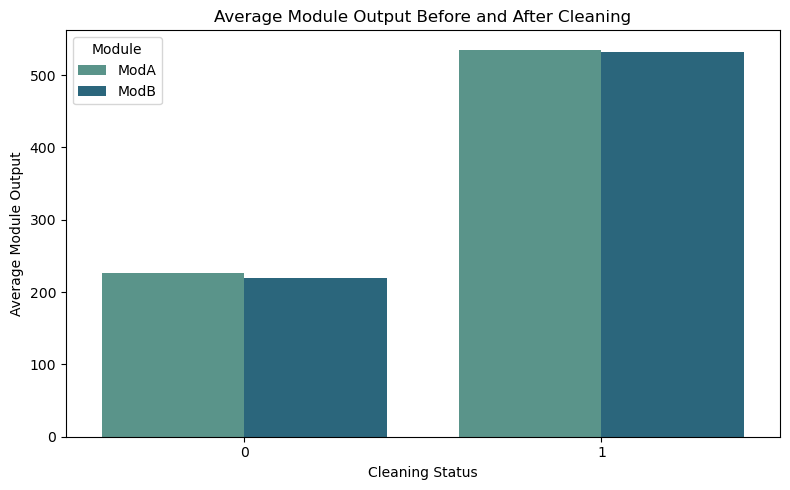

In [41]:
plt.figure(figsize=(8,5))
sns.barplot(data=cleaning_melted, x='Cleaning', y='Average_Value', hue='Module', palette='crest')
plt.title('Average Module Output Before and After Cleaning')
plt.xlabel('Cleaning Status')
plt.ylabel('Average Module Output')
plt.legend(title='Module')
plt.tight_layout()
plt.show()

### Summary
After panel cleaning, the average module outputs (ModA & ModB) increased from approximately 220 W/m² to 530 W/m², representing a ~140% improvement in measured performance.
This suggests that soiling exteremely reduced panel efficiency before cleaning, emphasizing the need for regular maintenance to sustain optimal energy yield.

## 5. Correlation and Relationship Analysis

---

### 5.1. Heatmap of correlations (GHI, DNI, DHI, TModA, TModB).

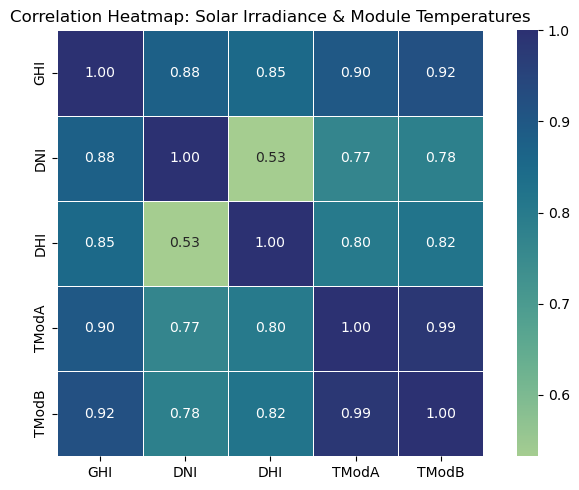

In [44]:
# Select relevant columns
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

# Compute correlation matrix
corr_matrix = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='crest', linewidths=0.5, square=True)
plt.title('Correlation Heatmap: Solar Irradiance & Module Temperatures')
plt.tight_layout()
plt.show()

### Summary
#### Irradiance Component Correlations
GHI, DNI, and DHI are correlated as they are all measure solar irradiance. However the level is different.
* GHI vs. DNI (0.88) & GHI vs. DHI (0.85): Global Horizontal Irradiance (GHI) has a very strong correlation with both the direct beam (DNI) and scattered light (DHI). This is expected, as GHI is the sum of horizontal components of DNI and DHI, meaning total energy is dependent on both sources.
* DNI vs. DHI (0.53): This is the weakest correlation in the matrix.
#### Module Temperature Correlations (TModA and TModB)
TModA vs. TModB (0.99): There is a near-perfect positive correlation between the temperatures of Module A and Module B. This is expected, as they are exposed to the same ambient conditions, irradiance, and likely mounted similarly.
#### Solar Irradiance and Module Temperature Relationships
* GHI vs. TModB (0.92):	Highest Correlation	GHI (Total Energy) is the single best predictor of module temperature. The total amount of energy falling on a horizontal plane (the module) is the primary heat source.
* GHI vs. TModA (0.90):	Extremely Strong	The relationship is consistently strong across both modules.
* DHI vs. TModB (0.82):	Very Strong	Diffuse light is a highly effective heat source. This correlation value is particularly notable.
* DHI vs. TModA (0.80):	Very Strong	The conditions that produce high DHI (e.g., humid, hazy, or cloudy days) are often associated with low wind speeds and high ambient temperature, leading to effective heat trapping and high module temperatures.
* DNI vs. TModA/B (0.77 / 0.78):	Strong	The direct beam is a major heat source, but its correlation is slightly lower than that of GHI and, surprisingly, is lower than DHI's correlation with TModB (0.82).

### 5.2. Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI.

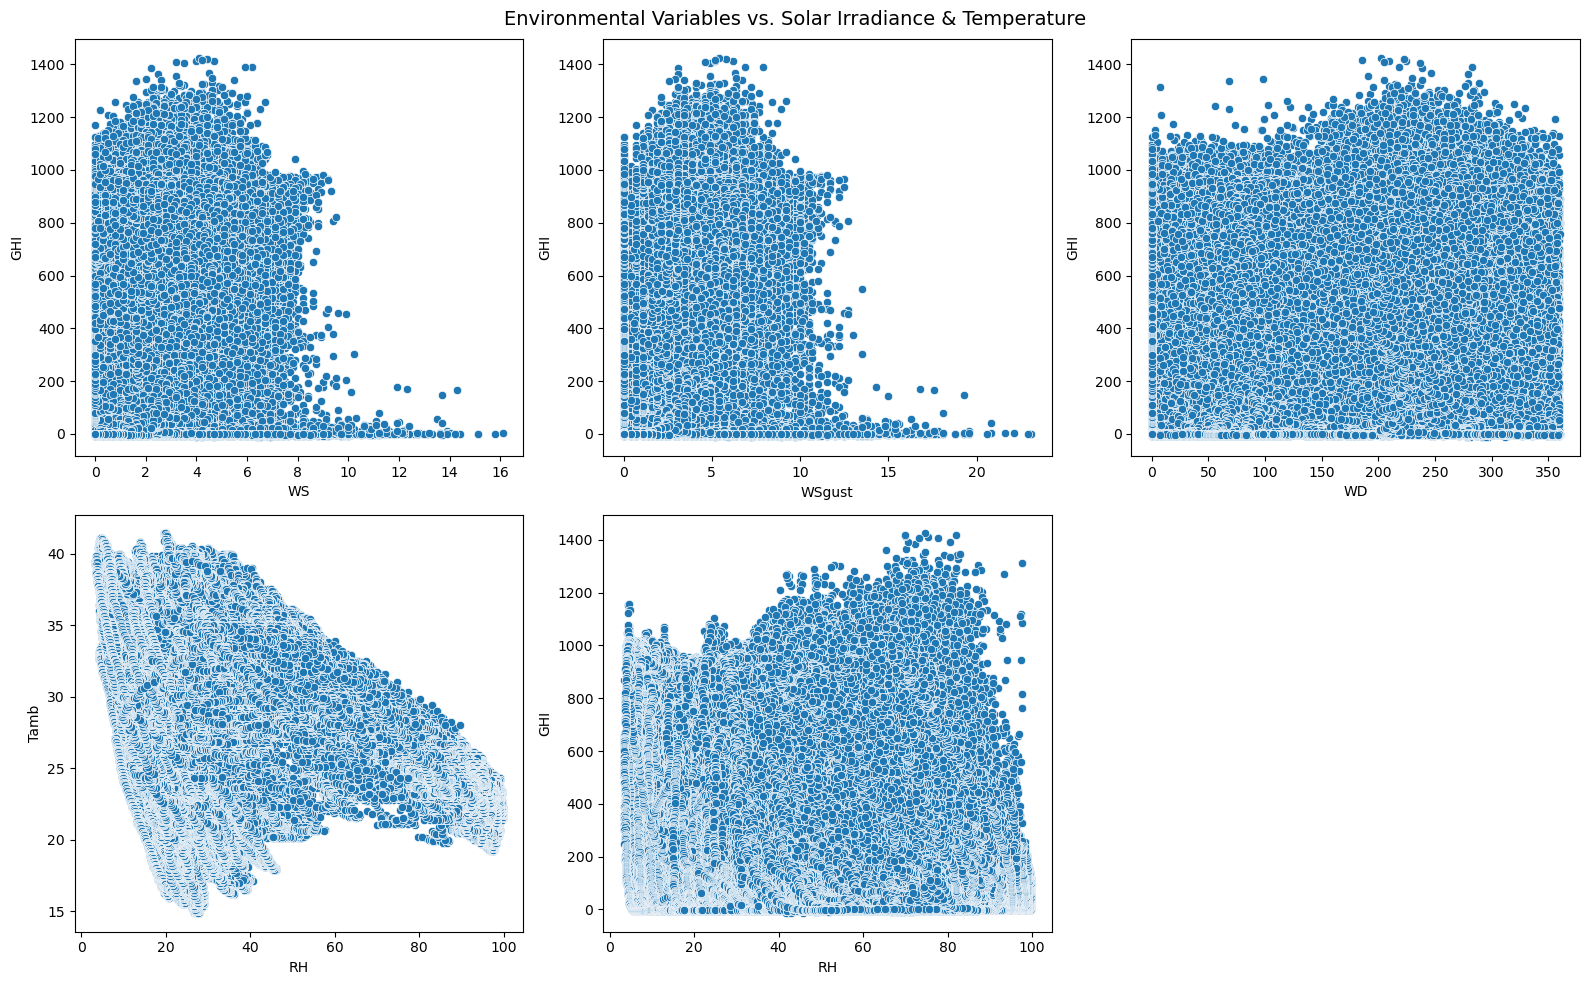

In [48]:
fig, axes = plt.subplots(2, 3, figsize=(16,10))
sns.scatterplot(data=df, x='WS', y='GHI', ax=axes[0,0])
sns.scatterplot(data=df, x='WSgust', y='GHI', ax=axes[0,1])
sns.scatterplot(data=df, x='WD', y='GHI', ax=axes[0,2])
sns.scatterplot(data=df, x='RH', y='Tamb', ax=axes[1,0])
sns.scatterplot(data=df, x='RH', y='GHI', ax=axes[1,1])

axes[1,2].axis('off')  # empty last subplot
fig.suptitle('Environmental Variables vs. Solar Irradiance & Temperature', fontsize=14)
plt.tight_layout()
plt.show()

### Summary
* GHI vs. WS (Top Left):
    * GHI vs. WS (Wind Speed): The maximum Global Horizontal Irradiance (GHI) values, which peak near $1400 \text{ W/m}^2$, are strictly confined to low wind speeds (approximately $0$ to $8 \text{ m/s}$). As Wind Speed (WS) increases beyond this range, the maximum GHI sharply drops.
* GHI vs. WSgust (Top Middle):
    *  The pattern is reinforced by wind gust data. High GHI is only observed when the wind gust speed (WSgust) is low (below $\approx 10 \text{ m/s}$). Gusts above $15 \text{ m/s}$ correspond almost exclusively to very low or zero GHI.
* GHI vs. WD (Top Right):
    *The data points, including the highest GHI values, are uniformly distributed across all $360^{\circ}$ of wind direction. This indicates that the occurrence of peak solar irradiance is independent of the wind's source direction over the dataset's observation period.
* Tamb vs. RH (Bottom Left):
    * This plot shows a classic inverse "wedge" pattern. The highest ambient temperatures ($\approx 40-45^\circ\text{C}$) are only possible at low Relative Humidity (RH) ($\approx 10\%-30\%$ RH), representing hot, dry air.
* GHI vs. RH (Bottom Right):
    * High GHI (clear sky conditions) is observed across a wide range of RH ($0\%$ to over $90\%$ RH). This suggests that clear, sunny skies can occur in both dry and humid air masses. However, there is a noticeable drop-off in maximum GHI near $100\%$ RH, as expected when the air is fully saturated

## 6. Wind & Distribution Analysis

---

### 6.1. Wind rose or radial bar plot of WS/WD.

In [50]:
# Make sure direction and speed columns are valid
df = df.dropna(subset=['WD', 'WS'])
df['WD'] = df['WD'] % 360  # normalize directions

In [52]:
# Define compass sectors (16 bins)
bins = np.arange(-11.25, 371.25, 22.5)
labels = [
    'N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
    'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW'
]
df['WD_bin'] = pd.cut(df['WD'], bins=bins, labels=labels, right=False)

# Compute average WS per direction
wind_summary = df.groupby('WD_bin')['WS'].mean().reindex(labels)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12324\2902550961.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_summary = df.groupby('WD_bin')['WS'].mean().reindex(labels)


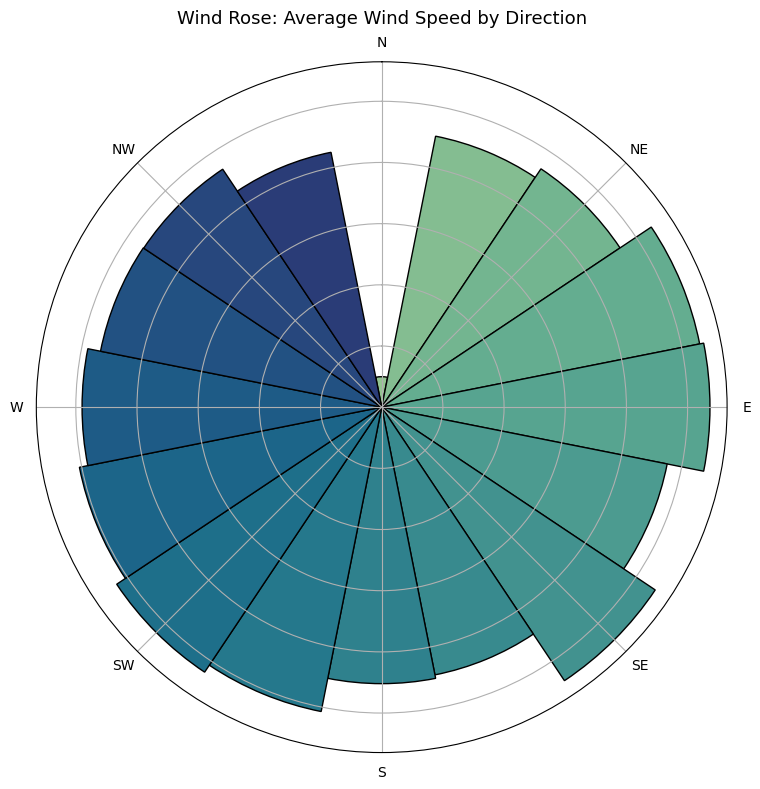

In [54]:
# Convert to radians
angles = np.deg2rad(np.linspace(0, 360, len(wind_summary), endpoint=False))

# Setup polar plot
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)

# Bars
bars = ax.bar(angles, wind_summary, width=np.deg2rad(22.5), color=sns.color_palette('crest', len(wind_summary)), edgecolor='black')

# Format
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title('Wind Rose: Average Wind Speed by Direction', va='bottom', fontsize=13)

# Add direction labels
ax.set_xticks(np.deg2rad(np.arange(0, 360, 45)))
ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])
ax.set_yticklabels([])

plt.tight_layout()
plt.show()

### 6.2. Histograms for GHI and one other variable (e.g. WS).

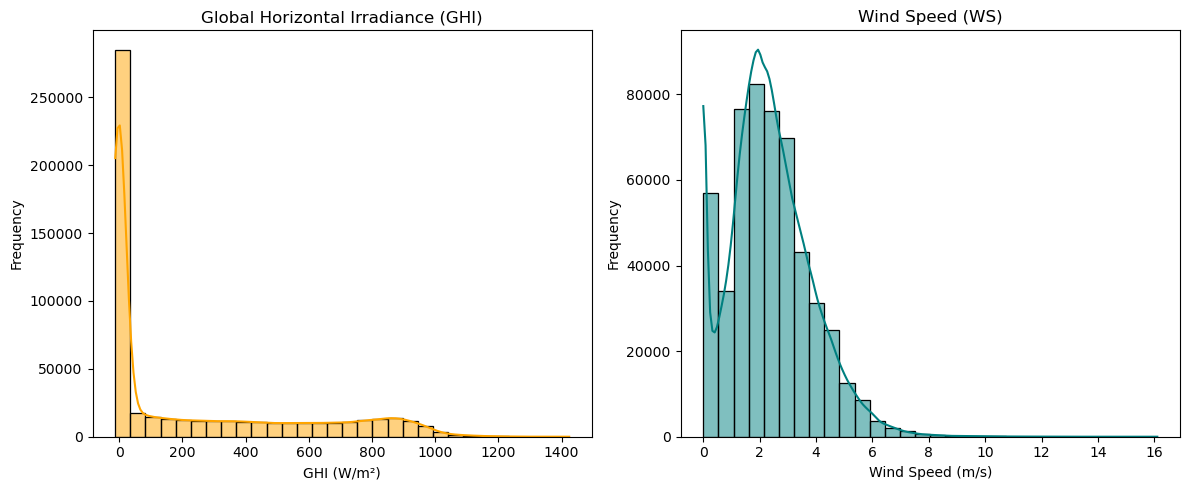

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df['GHI'], bins=30, kde=True, color='orange', ax=axes[0])
axes[0].set_title('Global Horizontal Irradiance (GHI)')
axes[0].set_xlabel('GHI (W/m²)')
axes[0].set_ylabel('Frequency')

sns.histplot(df['WS'], bins=30, kde=True, color='teal', ax=axes[1])
axes[1].set_title('Wind Speed (WS)')
axes[1].set_xlabel('Wind Speed (m/s)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 7. Temprature Analysis

---

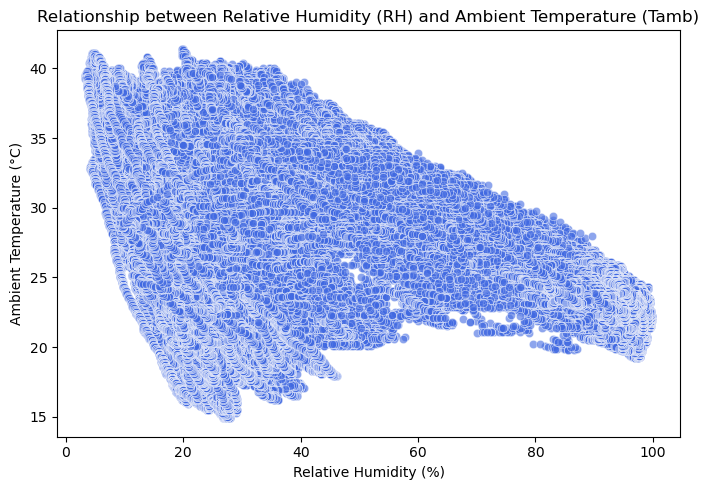

In [58]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='RH', y='Tamb', alpha=0.6, color='royalblue')
plt.title('Relationship between Relative Humidity (RH) and Ambient Temperature (Tamb)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.tight_layout()
plt.show()

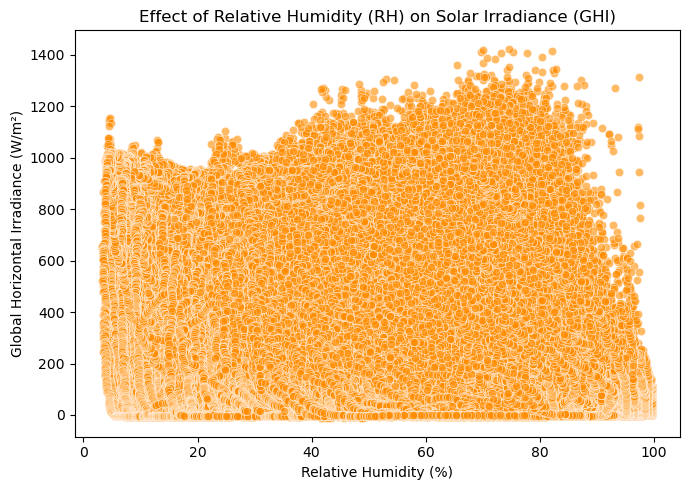

In [60]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='RH', y='GHI', alpha=0.6, color='darkorange')
plt.title('Effect of Relative Humidity (RH) on Solar Irradiance (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Global Horizontal Irradiance (W/m²)')
plt.tight_layout()
plt.show()

In [62]:
print("Compare numerically")
corr_tamb = df['RH'].corr(df['Tamb'])
corr_ghi = df['RH'].corr(df['GHI'])

print(f"Correlation (RH vs Tamb): {corr_tamb:.2f}")
print(f"Correlation (RH vs GHI): {corr_ghi:.2f}")

Compare numerically
Correlation (RH vs Tamb): -0.40
Correlation (RH vs GHI): -0.26


### Summary
* RH vs Tamb Negative/inverse relation -0.40: High humidity tends to reduce temperature readings.
* RH vs GHI Negative/inverse relation -0.26: Cloudy/moist conditions block sunlight, reducing irradiance

## 8.Bubble Chart
---

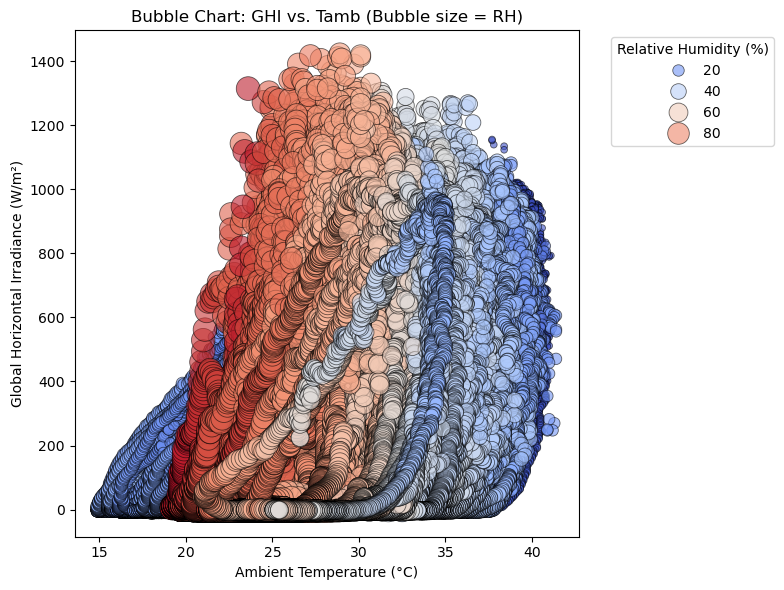

In [67]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='Tamb',
    y='GHI',
    size='RH',         # bubble size based on Relative Humidity
    sizes=(20, 300),   # min and max bubble sizes
    hue='RH',          # optional: color by humidity too
    palette='coolwarm',
    alpha=0.6,
    edgecolor='black'
)

plt.title('Bubble Chart: GHI vs. Tamb (Bubble size = RH)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Global Horizontal Irradiance (W/m²)')
plt.legend(title='Relative Humidity (%)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()